# SYNC INTERN'S
Beamlak Tesfahun

Task 2- Handwritten Digit Recognition

# Import Libraries and Modules

In [2]:
import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense , Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam ,RMSprop
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical # for one hot encoding
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.callbacks import ReduceLROnPlateau
import warnings
# filter warnings
warnings.filterwarnings('ignore')
# Input data files are available in the "../input/" directory.

import os
print("Modules have successfully been loaded")

Modules have successfully been loaded


# Loading Data

In [3]:
# Load training data
train = pd.read_csv(r'C:\Users\Tesfahun Sahilu\Desktop\Coursera\Handwritten Digit Detection Data Set\train.csv')
display(train.head()) # Returns the first 5 rows
display(train.tail()) # Returns the last 5 rows
print(f"train shape: {train.shape}")

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


train shape: (42000, 785)


In [4]:
# Load testing data
test = pd.read_csv(r'C:\Users\Tesfahun Sahilu\Desktop\Coursera\Handwritten Digit Detection Data Set\test.csv')
display(test.head()) # Returns the first 5 rows
display(test.tail()) # Returns the last 5 rows
print(f"test shape: {test.shape}")

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


test shape: (28000, 784)


# Data Preparation

In [5]:
# Preparing data for neural network
y_train = train["label"] # Put labels into y_train variable
X_train = train.drop(labels = ["label"],axis = 1) # Drop column 'label'

# Normalize the data
X_train = X_train / 255.0                                               
X_test = test / 255.0 
print(f"X_train shape: {X_train.shape}")
print(f"test shape: {test.shape}")

# Reshape
# Automatically_adjust_size, height, width, channels
X_train = X_train.values.reshape(-1,28,28,1) 
test = test.values.reshape(-1, 28, 28, 1)
print('After Reshaping:')
print(f"X_train shape: {X_train.shape}")
print(f"test shape: {test.shape}")

# One-hot encoding: conversion of categorical info into a format that imporves prediction accuracy
y_train = to_categorical(y_train, num_classes = 10)
y_train

X_train shape: (42000, 784)
test shape: (28000, 784)
After Reshaping:
X_train shape: (42000, 28, 28, 1)
test shape: (28000, 28, 28, 1)


array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

Split Data

In [6]:
# train dataset: 80% validation dataset: 20%
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=10)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")

X_train shape: (33600, 28, 28, 1)
y_train shape: (33600, 10)
X_val shape: (8400, 28, 28, 1)
y_val shape: (8400, 10)


# Data Visualization

30 sample handwritten digits from training data set


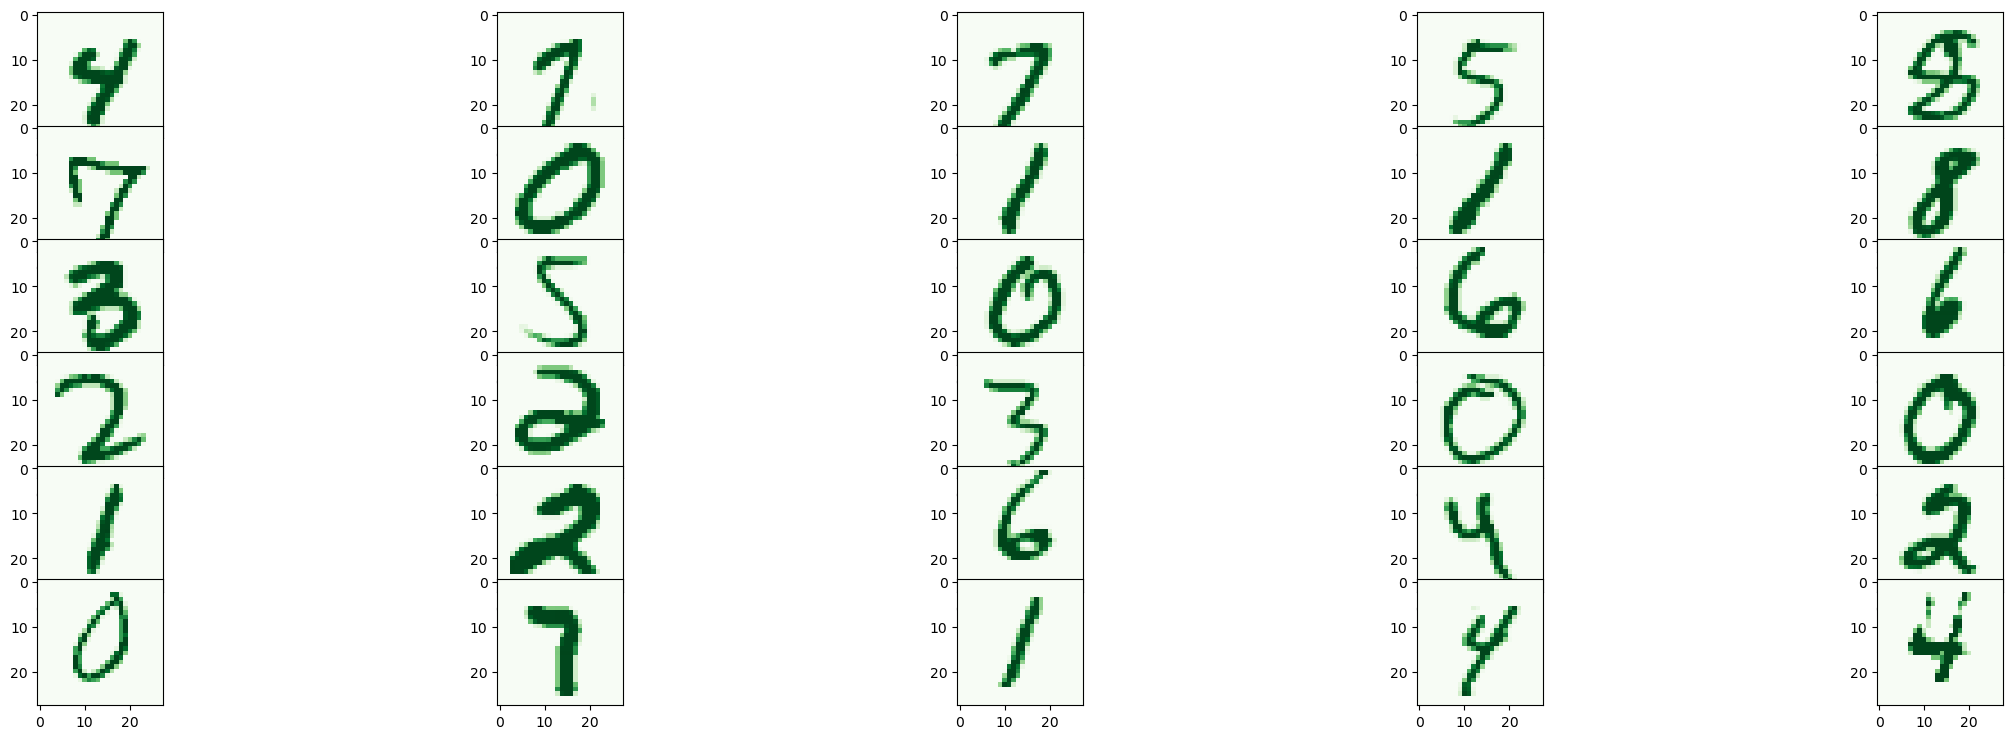

In [11]:
# Looking at some sample digits
print("30 sample handwritten digits from training data set" )
plt.figure(figsize=(30,9))
for i in range(30):
    plt.subplot(6, 10, (i+1)*2)       
    plt.imshow(X_train[i].reshape((28,28)),cmap=plt.cm.Greens)
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

# Data Augmentation

In [9]:
# 42000 training data and 28000 test data 
# Create an ImageDataGenerator instance to augment the training data
image_data_gen = ImageDataGenerator(
        rotation_range=15,  
        zoom_range = 0.10,  
        width_shift_range=0.15, 
        height_shift_range=0.15,)

image_data_gen.fit(X_train) # fit the data augmentation

# Visualizing Augmented Digits

Augmented sample 2


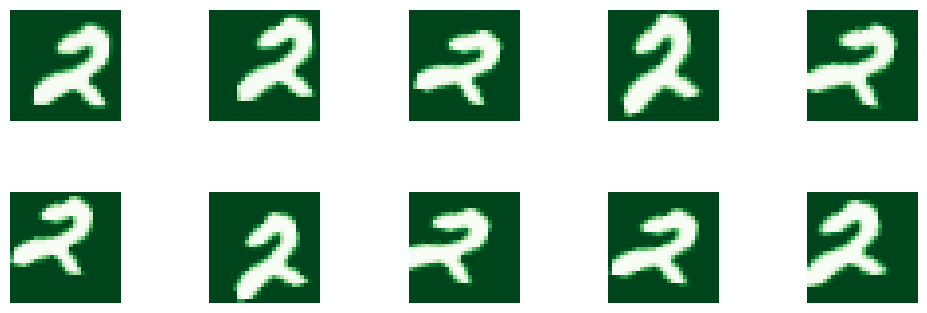



Augmented sample 5


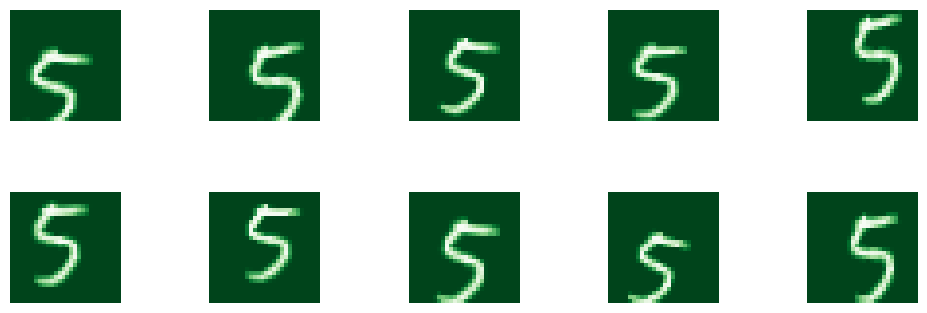

In [12]:
def plot_data_aug(number, index):
    X_train_i = X_train[index,].reshape((1,28,28,1))
    y_train_i = y_train[index,].reshape((1,10))
    
    print(f'Augmented sample {number}')
    plt.figure(figsize=(13,5))
    
    # plot the augmented samples
    for i in range(10):  
        plt.subplot(2, 10, (i+1)*2)
        X_train_, y_train_ = image_data_gen.flow(X_train_i,y_train_i).next()          
        plt.imshow(X_train_[0].reshape((28,28)),cmap=plt.cm.Greens.reversed())  
        plt.axis('off')
    plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
    plt.show()
    
#Displaying augmented digits 
#plot_data_aug(2, index=16)
#print('\n')
plot_data_aug(2, index=21)
print('\n')
plot_data_aug(5, index=3)

# Train Model

In [33]:
# Build Convolutional Neural Networks
model = Sequential()
# relu is used as a activation function in the hiddlen layers     
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Conv2D(filters=32, kernel_size=(5,5),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))


model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size = (3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Flatten layer changes the two dimentional matrix to one dimensional array
# Softmax activation function is used on the output layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Set annealer
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
 
# Set epochs and batch_size
epochs = 30
batch_size = 128

# Fit the model
history = model.fit(image_data_gen.flow(X_train,y_train, batch_size=batch_size), epochs = epochs, validation_data = (X_val,y_val),verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size,callbacks=[annealer],)

Epoch 1/30
262/262 - 84s - loss: 1.1021 - accuracy: 0.6481 - val_loss: 1.2657 - val_accuracy: 0.5743 - lr: 0.0010 - 84s/epoch - 320ms/step
Epoch 2/30
262/262 - 67s - loss: 0.3527 - accuracy: 0.8936 - val_loss: 0.1693 - val_accuracy: 0.9495 - lr: 9.5000e-04 - 67s/epoch - 255ms/step
Epoch 3/30
262/262 - 68s - loss: 0.2365 - accuracy: 0.9304 - val_loss: 0.0624 - val_accuracy: 0.9802 - lr: 9.0250e-04 - 68s/epoch - 261ms/step
Epoch 4/30
262/262 - 68s - loss: 0.1885 - accuracy: 0.9442 - val_loss: 0.0589 - val_accuracy: 0.9837 - lr: 8.5737e-04 - 68s/epoch - 261ms/step
Epoch 5/30
262/262 - 69s - loss: 0.1581 - accuracy: 0.9552 - val_loss: 0.0558 - val_accuracy: 0.9807 - lr: 8.1451e-04 - 69s/epoch - 265ms/step
Epoch 6/30
262/262 - 69s - loss: 0.1410 - accuracy: 0.9595 - val_loss: 0.0471 - val_accuracy: 0.9864 - lr: 7.7378e-04 - 69s/epoch - 264ms/step
Epoch 7/30
262/262 - 70s - loss: 0.1231 - accuracy: 0.9643 - val_loss: 0.0377 - val_accuracy: 0.9890 - lr: 7.3509e-04 - 70s/epoch - 267ms/step
Epo

In [34]:
history_df = pd.DataFrame(history.history)

# Plot Training and Validation Loss

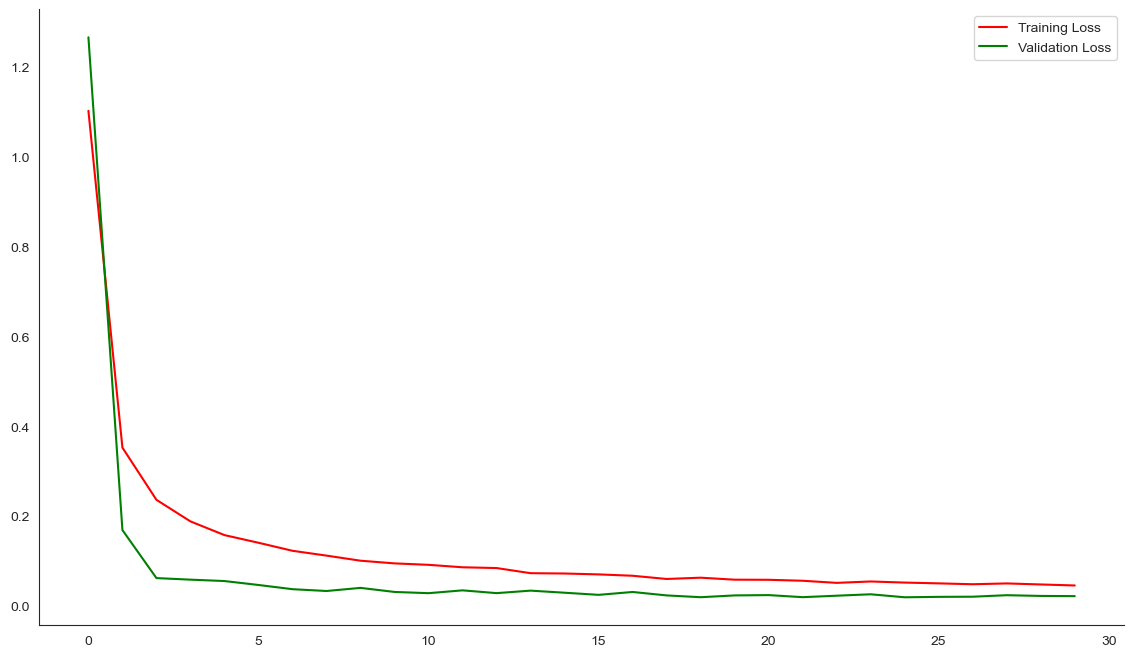

Minimum validation loss: 0.019708512350916862


In [37]:
plt.figure(figsize = (14, 8))
sns.set_style('white')

plt.plot(history.history['loss'], color='r', label="Training loss")
plt.plot(history.history['val_loss'], color='g', label="Validation loss")

plt.legend(['Training Loss', 'Validation Loss'])

sns.despine() # Remove borders
plt.show()
# Print min val loss
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

# Plot Training and Validation Accuracy

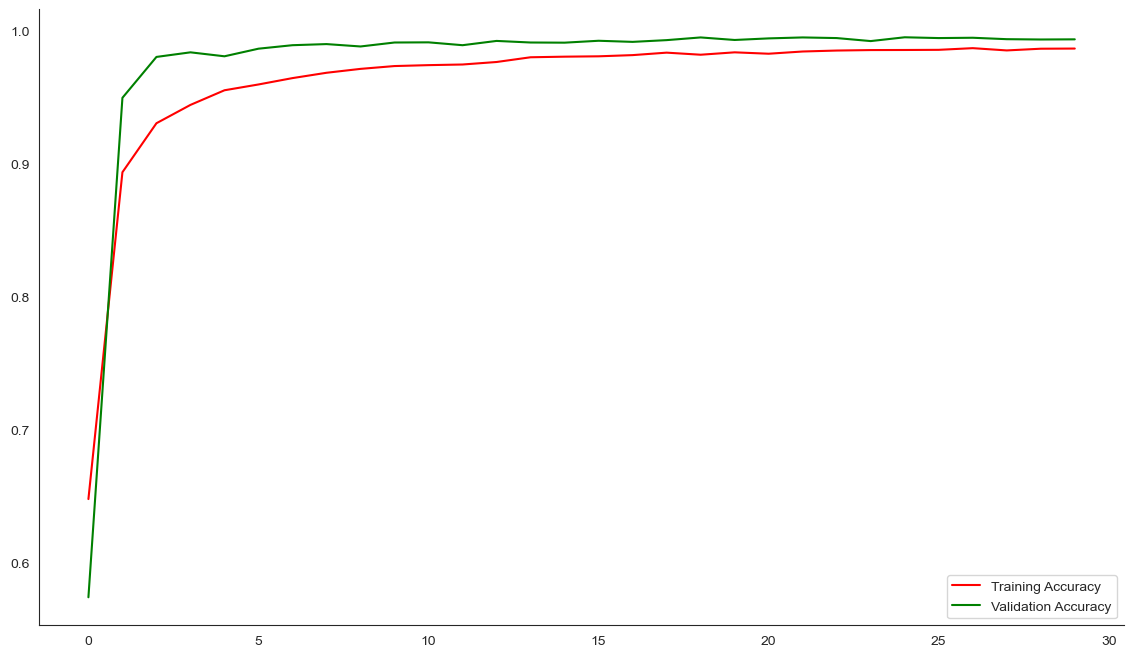

Maximum validation accuracy: 0.9950000047683716


In [36]:
plt.figure(figsize = (14, 8))
sns.set_style('white')

plt.plot(history.history['accuracy'], color='r', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='g', label="Validation accuracy")

plt.legend(['Training Accuracy', 'Validation Accuracy'])

sns.despine() # Remove borders
plt.show()
# print max validation accuracy
print("Maximum validation accuracy: {}".format(history_df['val_accuracy'].max()))

# Predict Results

In [38]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

875/875 [==============================] - 18s 20ms/step
